## Imports and defs

In [297]:
from operator import le
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from os import read
import math
import pandas as pd
from scipy import signal

def toInt(in_array):
    tmp = []
    for i in range(len(in_array)):
        tmp.append(int(in_array[i]))
    return tmp
def fillWindow(w_size, value):
    window = []
    for x in range (w_size):
        window.append(value)
    return window

def getSlindingWindows(in_array, w_size):
    windows = []
    tmp_window = fillWindow(w_size, in_array[0])
    for x in range (len(in_array)):
        tmp_window = tmp_window[1:]
        tmp_window.append(in_array[x])
        windows.append(tmp_window)
    return windows



def getWindowsFromArrayOfSize(in_array, w_size):
    windows = []
    for x in range(math.floor(len(in_array) / w_size)):
        tmp = []
        for w in range(w_size):
            tmp.append(in_array[x*w_size + w])
        windows.append(tmp)
    return windows


def getWindowsFromSBit(in_array, w_size):
    fth = 150
    bits = 16
    cont_ = True
    i = 0
    while cont_:
        if (in_array[i] > fth):
            cont_ = False
        else:
            i += 1
    mod_array = in_array[i: i + bits* w_size ]
    return mod_array
    

def appendZeros(in_array, zeros):
    tmp = in_array
    for x in range(zeros):
        tmp.append(0)
    return tmp


def getAverage(window):
    sum = 0
    for x in range(0, len(window)):
        sum+= window[x]
    avg = sum / len(window)
    return avg



def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


def getMin(window):
    min = 9000
    for x in range(0, len(window)):
        if(window[x] <  min):
            min = window[x]
    return min

def getMax(window):
    max = 0
    for x in range(0, len(window)):
        if(window[x] >  max):
            max = window[x]
    return max 

import os
cut_freq = 30
fs = 1000
order = 5

def getDataFromFilesinDirSliding(directory, window_size):
    file_windows = []
    for filename in sorted(os.listdir(directory)):
        fn = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(fn):
            if ("encoded" not in fn):
                #print(fn)
                f = open(fn, "r")
                file_data = f.readlines()
                data = toInt(file_data)
                filtered = butter_highpass_filter(data, cut_freq, fs, order)
                windows = getSlindingWindows(filtered, window_size)
                file_windows.append(windows)
    return file_windows

def getDataFromFilesinDirNormal(directory, window_size):
    time_windows = []
    for filename in sorted(os.listdir(directory)):
        fn = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(fn):
            if ("encoded" not in fn):
                #print(fn)
                f = open(fn, "r")
                file_data = f.readlines()
                data = toInt(file_data)
                filtered = butter_highpass_filter(data, cut_freq, fs, order)
                windows = getWindowsFromSBit(filtered, window_size)
                time_windows.append(windows)
    return time_windows


#TODO: we here
def fix_window(window, window_size):
    d = window[window_size - 1]
    for x in range (len(window) - window_size):
        window.append(d)

def get_n_above_threshold(window, threshold):
    n = 0
    for x in window:
        if x > threshold:
            n = n + 1
    return n

def firstDev(window):
    dev = 0
    devs = []
    p = 0
    for x in range (1, len(window)):
        dev = abs((window[x] - window[x-1]))
        devs.append(dev)
    devs.append(dev)
    return devs
        

## File reading

In [298]:
# actual readinf
#filter parameters


window_size = 14
directory = 'data/samples/'
file_windows = getDataFromFilesinDirSliding(directory, window_size)
time_windows = getDataFromFilesinDirNormal(directory, window_size)
len(time_windows[1])

224

In [299]:
def getMessage(window, threshold,  window_size):
    fwin = getWindowsFromArrayOfSize(window, window_size)
    s = ""
    for i in range (len(fwin)):
        if (getAverage(fwin[i]) > getAverage(window)):
            s = s + '1'
        else:
            s = s + '0'
    return s

<AxesSubplot: >

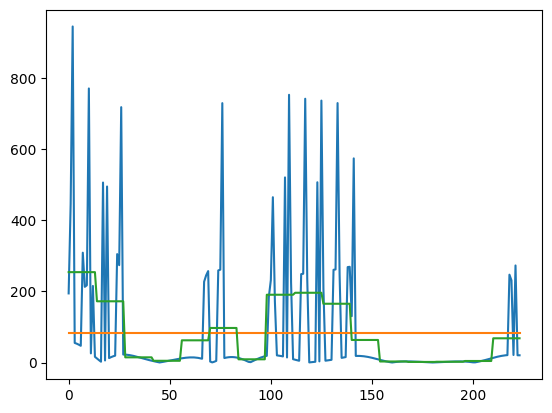

In [300]:
n = 1
devs = []
for w in time_windows:
    devs.append(firstDev(w))

df2 = pd.Series(data = devs[n])
df2.plot()
datas = []
for s in range (len(devs[n])):
    datas.append(getAverage(devs[n]))
df2 = pd.Series(data = datas)
df2.plot()

datas = []
wins  = []

wins = getWindowsFromArrayOfSize(devs[n], window_size)
for x in range(len(devs[n])):
    index = int(x/window_size)
    avg = getAverage(wins[index])
    datas.append(avg)
df2 = pd.Series(data = datas)
df2.plot()



## Time-domain

In [301]:

threshold = 120
devs = []
converted = []
for w in time_windows:
    devs.append(firstDev(w))
for w in devs:
    s = getMessage(w, threshold, window_size)
    print(s)
    converted.append(s)


1100101110000000
1100010111000000
1100000000000000
1100101110011110
1100101110101010
1100101110001001
1100101110110011
1100101110110000
1100101111001011
1100101111001100
1100101111000010
1100101111010101
1100101111100001
1100101111100100
1100101111111000
1100101111001111
1100110010000000
1100110010000111
1100110010011001
1100110010011110
1100110010101010
1100110010101101
1100110010110011
1100110010110100
1100110011000011
1100110011001100
1100110011010010
1100110011010101
1100110011100001
1100110011100110
1100110011111000
1100110011111111
1101001010000000
1101001010000111
1101001010011001
1101001010011110
1101001010101010
1101001010101101
1101001010110011
1101001010110100
1101001011001011
1101001011001100
1101001011010010
1101001011011101
1101001011100001
1101001011100110
1101001011111000
1101001011101001
1101010110000000
1101010100000111
1101010110011001
1101010110011110
1101010110101010
1101010110101001
1101010110110011
1101010110110000
1101010111000011
1101010111001100
11010101110100

## DFT computation

In [302]:
import math


tx_freq = 140
sampling_freq = 1000
fft_size = 256  
output_window = []
freqs = []

delta_freq = sampling_freq / (fft_size)
index = math.floor(tx_freq/delta_freq)


actual_windows = []
for k in range (len(file_windows)):
    stop = 0
    output_window = []
#k = 1
    output_window = []
    stop = 0
    for w in range(len(file_windows[k])):
        x = appendZeros(file_windows[k][w], fft_size-window_size)
        X = fft(x)
        X_abs = abs(X)
        output_window.append(X_abs[index])
    fth = 600
    cont_ = True
    i = 0
    while cont_:
        if (output_window[i] > fth):
            cont_ = False
        else:
            i += 1
    actual_windows.append(output_window[i:int(i+window_size*16)])
    #actual_windows.append(output_window)

print(len(actual_windows[0]))



224


<AxesSubplot: >

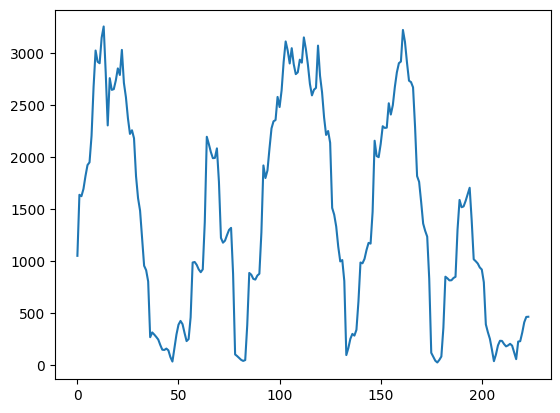

In [303]:
df2 = pd.Series(data = actual_windows[7])
df2.plot()



## ERROR computation

In [304]:
f = open("data/output.txt", "w")
for i in converted:
    f.write(i + '\n')

In [305]:
def getErrors(enc_data, out_data):
    err = 0
    pckt = 0
    for line in range(len(out_data)):
        pck_err = 0
        for bit in range(len(out_data[line])):
            if enc_data[line][bit] != out_data[line][bit]:
                err+=1
                pck_err += 1
        if pck_err > 0:
            pckt+=1
    error_rate = 100*(err)/(len(out_data[0])*len(out_data))
    pckt_error_rate = 100*(pckt)/(len(out_data))
    print(error_rate, pckt_error_rate)
        
import hamming_codec as hm
def decode(data):
    result = []
    for value in data:
        decoded = hm.decode(int(value, 2), len(value))
        result.append(decoded)
    return result

enc = open(directory + '/encoded.txt')
ot  = open('data/output.txt')

enc_data = enc.readlines()
out_data = ot.readlines()

getErrors(enc_data, out_data)



out_decoded = decode(out_data)
enc_decoded = decode(enc_data)
getErrors(enc_decoded, out_decoded)

3.265256206432677 27.85862785862786
2.997227997227997 20.166320166320165
